<a href="https://colab.research.google.com/github/steffenmodest/Python_Examples/blob/main/MINIST_Augmentation_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

### MNIST Datensatz laden

In [2]:
# Datensatz angeben
data = keras.datasets.mnist

# Datensatz herunterladen, Aufteilen der Daten in Test- und Trainingsdaten
(train_images, train_labels), (test_images, test_labels) = data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Bilder aus dem Datensatz anzeigen

Zur genaueren Inspektion dieses und anderer Datensätze eignet sich zum Beispiel die Bibliothek `matplotlib`.

Die nachfolgenden Befehle sollten nach dem letzten Video bereits bekannt sein.


In [6]:
import matplotlib.pyplot as plt
# Magischer Befehl für die Verwendung von matplotlib in lokalen jupyter notebooks
%matplotlib inline

Wir hatten bereits ein paar kleine Änderungen an den geladenen Daten vorgenommen. Diese wollen wir folgend mit dem erneuten Laden der Daten rückgängig machen, um anschließend mit den usprüglichen Daten zu arbeiten.  

In [7]:
# Erneutes Laden der Test- und Trainingsdaten
(train_images, train_labels), (test_images, test_labels) = data.load_data()
train_images = train_images[:5]

# Größe des neuen Trainingsdatensatzes (Länge, Höhe und Tiefe des Numpy-Arrays)
print(train_images.shape)

(5, 28, 28)


Wir wollen uns nun die einzelnen Bilder des MNIST-Datensatzes und eine zugehörige Legende anzeigen lassen, um ein Gefühl für die Daten zu erhalten.

Auf diese Weise lassen sich in einem späteren Video falsch klassifizierte Bilder des Netzes anzeigen.

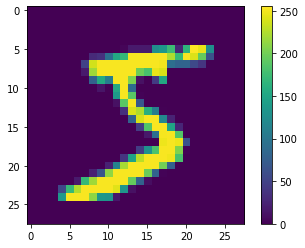

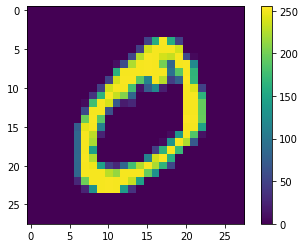

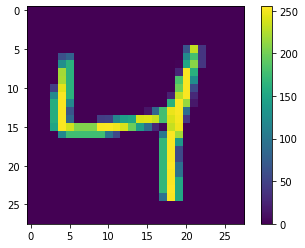

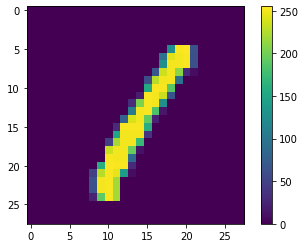

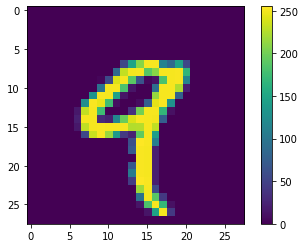

In [8]:
for image in train_images:
  plt.imshow(image)
  plt.colorbar()
  plt.show()

Wir wollen für das Trainieren unseres Netzes gerne normalisierte Pixelwerte zwischen 0 bis 1. Das Erreichen wir, indem wir jeden Eintrag in den `train_images` durch 255 teilen. 

Noise

In [9]:
# Noise kann beliebig gewählt werden mit Wahl des Zufallsgenerators
noise_matrix = np.random.random((28,28))

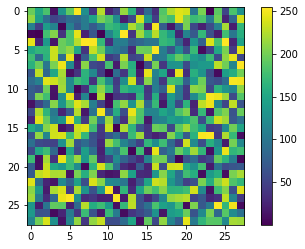

(5, 28, 28)


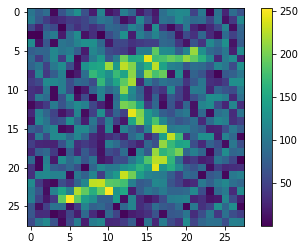

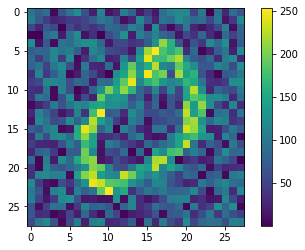

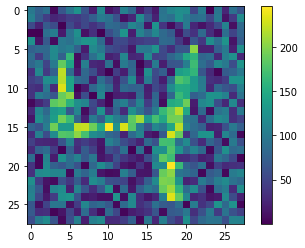

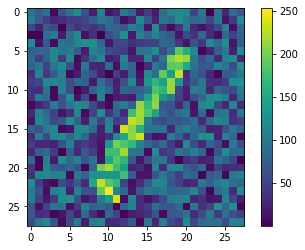

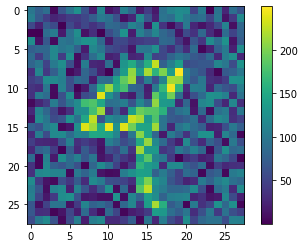

In [10]:
mnist_noise_matrix = noise_matrix * 255
plt.imshow(mnist_noise_matrix)
plt.colorbar()
plt.show()
new_train_data = (train_images + mnist_noise_matrix) / 2
print(new_train_data.shape)
for image in new_train_data:
    plt.imshow(image)
    plt.colorbar()
    plt.show()

Flipping

(5, 28, 28)


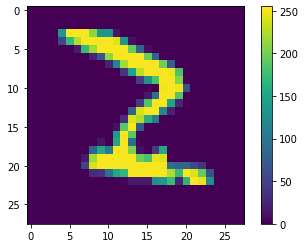

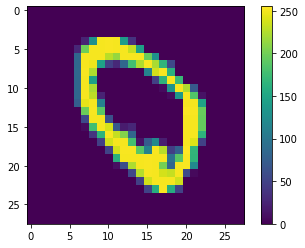

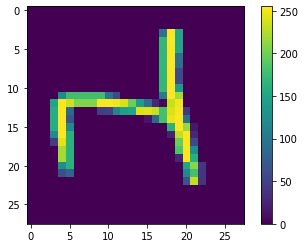

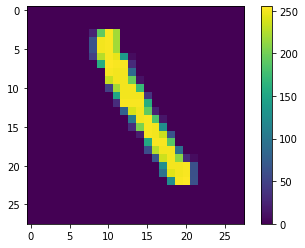

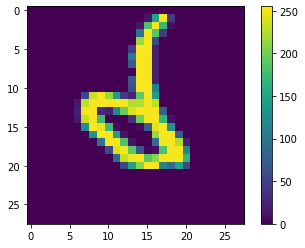

In [11]:
# flip_train_data = np.rot90(train_images, k=2,axes=(1,0))
flip_train_data = np.fliplr(train_images)
print(flip_train_data.shape)
for image in flip_train_data:
    plt.imshow(image)
    plt.colorbar()
    plt.show()

Shift

(5, 28, 28)
(10, 28, 28)


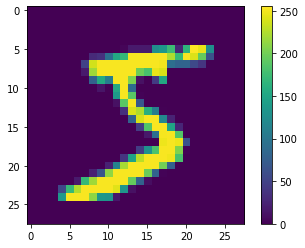

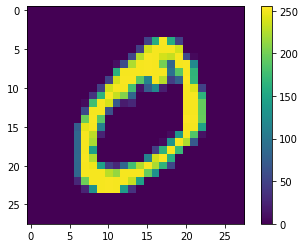

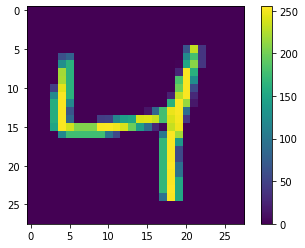

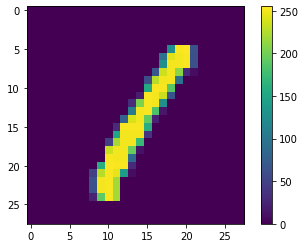

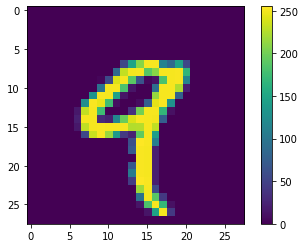

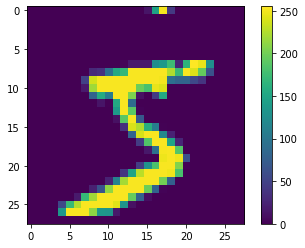

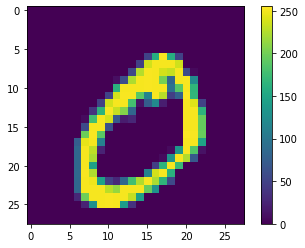

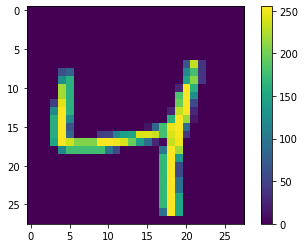

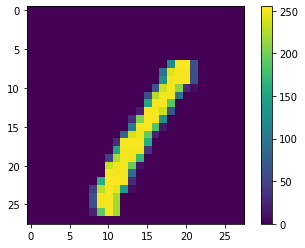

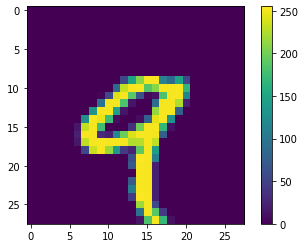

In [20]:
shift_train_data = np.roll(train_images,56)
print(shift_train_data.shape)
extended_train_images = np.append(train_images, shift_train_data, axis=0)
print(extended_train_images.shape)
for image in extended_train_images:
    plt.imshow(image)
    plt.colorbar()
    plt.show()
# extended_train_images = np.append(train_images, shift_train_data, axis=0)
# print(extended_train_images.shape)

Rotate

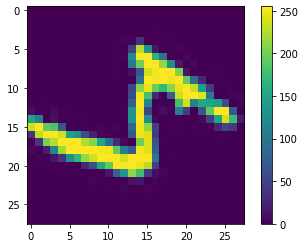

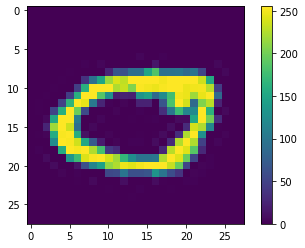

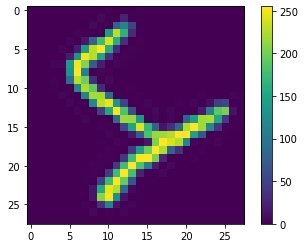

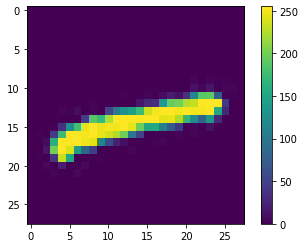

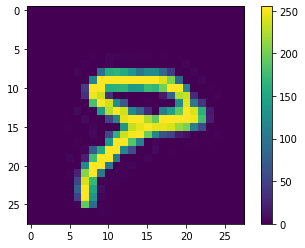

In [13]:
# flip_train_data = np.rot90(train_images, k=2,axes=(1,0))
from scipy import ndimage
# image = ndimage.rotate(train_images[3], 45, reshape=False, mode='mirror', axes=(1,0))
# rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)
# flip_train_data = np.roll(train_images,1)
# print(rot_train_images.shape)
for t_image in train_images:
    # image = ndimage.rotate(t_image, 45, reshape=False, mode='mirror', axes=(1,0))
    image = ndimage.rotate(t_image, -45, reshape=False, axes=(1,0))
    plt.imshow(image)
    plt.colorbar()
    plt.show()

In [ ]:
normalized_train_images = train_images / 255

Das Ergebnis der Normalisierung wollen wir uns ebenso ausgeben und sehen anhand der Legende unseren Erfolg.

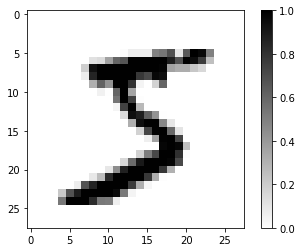

In [ ]:
# Als colormap (cmap) nutzen wir "binary", da wir nur zwischen weiß und schwarz interpolieren wollen
plt.imshow(normalized_train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

### Datensatz bearbeiten (Noise hinzufügen)

Dies ist absolut optional und nur ein kleiner Ausblick in das Thema *Data Augmentation*, worauf wir in Woche 4 genauer eingehen wollen.


Wir erzeugen eine Matrix der Größe 28 x 28 mit Werten zwischen 0 und 1 (Befehl sollte vom NumPy Video bekannt sein). Die zufällig erzeugt Matrix wollen wir mit dem gleich großen Trainingsbild addieren, um dem Bild Rauschen hinzuzufügen.

Mittels dieses Rauschens haben wir ein neues Bild erzeugt, welches wir für das Training unseres Netzes verwenden könnten.


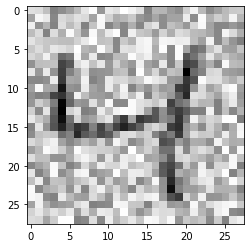

In [ ]:
# Noise kann beliebig gewählt werden mit Wahl des Zufallsgenerators
noise_matrix = np.random.random((28,28))
# Addieren der Matrix mit Noise auf die ursprüngliche Matrix
new_train_data = normalized_train_images[2] + noise_matrix
# Neues Bild anzeigen
plt.imshow(new_train_data, cmap=plt.cm.binary)
plt.show()

### Datensatzwerte erzeugen 

Eine weitere Möglichkeit den Datensatz zu bearbeiten (erweitern) bietet die Transponierung.
`new_train_data = train_images[1].T` erzeugt eine an der Diagonalen gespiegelte 0, welche weiterhin als 0 klassifiziert werden soll, aber aufgrund der Spiegelung anders aussieht.

Die Funktion `np.rot90` ermöglicht uns Bilder um Vielfache von 90° zu drehen und auf diese Weise neue Daten zu generieren. Eine 0 die um 180° gedreht wurde, also auf dem Kopf steht, sollte weiterhin als 0 klassifiziert werden.

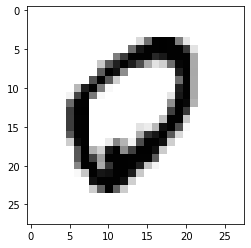

In [ ]:
# 2-fache Drehung um 90° (auf dem Kopf stehende 0)
flipped_zero = np.rot90(normalized_train_images[1])
flipped_zero = np.rot90(flipped_zero)

# Neues Bild anzeigen
plt.imshow(flipped_zero, cmap=plt.cm.binary)
plt.show()

Anschließend wollen wir das neu generierte Bild an den bestehenden Datensatz anhängen. 
Hierfür müssen beide nd-Arrays, welche wir aneinander hängen, die gleiche Dimension (Größe) besitzen. Also formen wir flipped_zero von einem 2D-Array zu einem 3D-Array.

In [ ]:
# flipped_zero wird zu Array der Länge 1 mit einer 28x28 Matrix
flipped_zero = flipped_zero.reshape(1,28,28)

# Damit können wir das 1x28x28 flipped_zero Array mit dem 60000x28x28 train_images Array zusammenfügen
extended_train_images = np.append(normalized_train_images, flipped_zero, axis=0)
print(extended_train_images.shape)

(60001, 28, 28)


### Kleiner Hinweis am Ende

Warum haben wir uns bereits jetzt mit dem Thema *Data Augmentation* beschäftigt?

Der MNIST Datensatz ist eigentlich nicht komplex genung, um die Daten beliebig zu manipulieren und trotzdem sinnvolle Erkenntnisse über den Datensatz zu gewinnen oder diesen mit neuen Daten zu erweitern, um daran noch besser zu lernen.
- Der Datensatz hat sich für wissenschaftliche Zwecke bewährt und wurde mehrfach verbessert
- Erweiterung um neue Daten nicht notwendig

Wir lernen später in Woche 4, wie man mit anspruchsvollen Datensätzen arbeitet (z.B. `tf_flowers` mit wenig Daten) und werden dann eventuell mittels Data Augemntation neue Daten erzeugen müssen. 

Der viel wichtigere Grund ist jedoch, dass wir Methoden und Tools kennengelernt haben, die uns dabei helfen einen Eindruck von den Daten zu bekommen. Das ist besonders wichtig wenn man an einem eigenen Image Recognition Projekt arbeitet. Es ist wichtig die Daten zu verstehen und zu optimieren. Daher finde wir es sinnvoll, wenn vorab schonmal ein bisschen mit den Daten herumgespielt wird.
